In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [304]:
#file = 'diabetes_null.csv'
file = 'datasets_228_482_diabetes.csv'
df = pd.read_csv(file)

In [305]:
df.shape

(768, 9)

In [306]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [307]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [308]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [309]:
(df.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [310]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


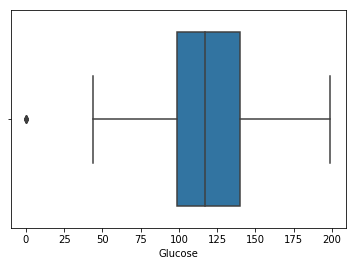

In [311]:
sns.boxplot(x='Glucose',data=df)

In [312]:
df['Glucose'] = np.where(df['Glucose'] == 0,df['Glucose'].mean(),df['Glucose'])

In [313]:
(df.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

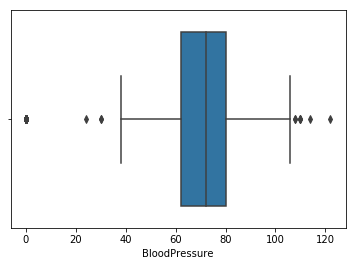

In [301]:
sns.boxplot(x='BloodPressure',data=df)

In [314]:
df['BloodPressure'] = df['BloodPressure'] = np.where(df['BloodPressure'] == 0,df['BloodPressure'].median(),df['BloodPressure'])

In [315]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.074934,0.331190,0.235147,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.007937,-0.045769,0.234336,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074934,0.007937,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331190,-0.045769,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.235147,0.234336,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [316]:
df['BMI'] = df['BMI'] = np.where(df['BMI'] == 0,df['BMI'].median(),df['BMI'])

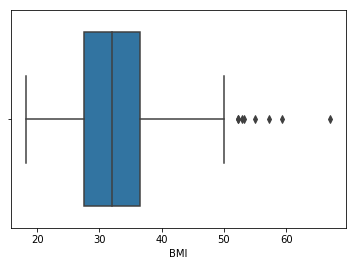

In [317]:
sns.boxplot(x='BMI',data=df)

In [318]:
(df.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

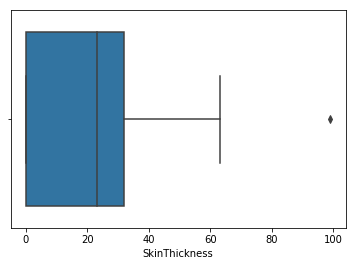

In [319]:
sns.boxplot(x='SkinThickness',data=df)

In [320]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.074934,0.331190,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.007937,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074934,0.007937,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331190,-0.045769,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231469,0.281132,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


In [321]:
df['SkinThickness'] = df['SkinThickness'] = np.where(df['SkinThickness'] == 0,df['SkinThickness'].median(),df['SkinThickness'])

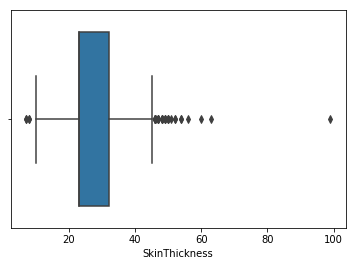

In [322]:
sns.boxplot(x='SkinThickness',data=df)

In [323]:
(df.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

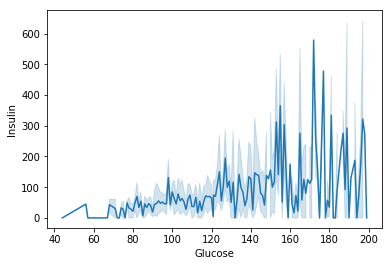

In [324]:
sns.lineplot(x='Glucose',y='Insulin',data=df)

In [91]:
df.loc[np.where((df['Glucose'] >=120) & (df['Glucose'] <140))].mean()

Pregnancies                   3.976190
Glucose                     128.205194
BloodPressure                73.750000
SkinThickness                27.690476
Insulin                      89.000000
BMI                          32.872619
DiabetesPedigreeFunction      0.471988
Age                          34.261905
Outcome                       0.386905
dtype: float64

In [90]:
df.loc[np.where((df['Glucose'] >=140) & (df['Glucose'] <180))].mean()

Pregnancies                   4.741722
Glucose                     156.172185
BloodPressure                76.576159
SkinThickness                29.417219
Insulin                     127.013245
BMI                          34.922517
DiabetesPedigreeFunction      0.496980
Age                          37.781457
Outcome                       0.635762
dtype: float64

In [89]:
df.loc[np.where(df['Glucose'] >=180)].mean()

Pregnancies                   4.130435
Glucose                     188.391304
BloodPressure                75.413043
SkinThickness                30.804348
Insulin                     164.021739
BMI                          34.971739
DiabetesPedigreeFunction      0.653043
Age                          39.304348
Outcome                       0.847826
dtype: float64

In [78]:
df.loc[np.where(df['Glucose'] <120)]['Insulin'].mean()

48.660049627791565

In [103]:
def impute_insulin(cols):
    Glucose = cols[0]
    Insulin = cols[1]
    if Insulin == 0:
        if Glucose < 120:
            return(df.loc[np.where((df['Glucose'] <120) & (df['Insulin']>0))]['Insulin'].mean())
        elif 120 <= Glucose < 140:
            return(df.loc[np.where((df['Glucose'] >=120) & (df['Glucose'] <140) & (df['Insulin']>0))]['Insulin'].mean())
        elif 140 <= Glucose < 180:
            return(df.loc[np.where((df['Glucose'] >=140) & (df['Glucose'] <180) & (df['Insulin']>0))]['Insulin'].mean())
        elif Glucose >= 180:
            return(df.loc[np.where((df['Glucose'] >=180) & (df['Insulin']>0))]['Insulin'].mean())
    else:
        return(Insulin)
        

In [325]:
df['Insulin'] = df[['Glucose','Insulin']].apply(impute_insulin,axis=1)

In [326]:
(df.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [327]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,0.032568,0.062370,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.172361,0.664170,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.147809,0.127595,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172361,0.147809,1.000000,0.173179,0.546951,0.142977,0.054514,0.189065
Insulin,0.062370,0.664170,0.127595,0.173179,1.000000,0.232037,0.128849,0.197088,0.332232
BMI,0.021546,0.231469,0.281132,0.546951,0.232037,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.142977,0.128849,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,0.054514,0.197088,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.189065,0.332232,0.312249,0.173844,0.238356,1.000000


In [186]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [189]:
for c in df.columns:
    print(df[c].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
100.0    17
99.0     17
125.0    14
106.0    14
111.0    14
129.0    14
108.0    13
102.0    13
105.0    13
112.0    13
95.0     13
122.0    12
109.0    12
124.0    11
90.0     11
128.0    11
119.0    11
114.0    11
107.0    11
120.0    11
117.0    11
115.0    10
84.0     10
92.0      9
103.0     9
91.0      9
88.0      9
97.0      9
126.0     9
123.0     9
         ..
159.0     2
153.0     2
193.0     2
157.0     2
75.0      2
77.0      2
175.0     2
170.0     2
195.0     2
76.0      2
174.0     2
56.0      1
191.0     1
177.0     1
199.0     1
190.0     1
65.0      1
198.0     1
67.0      1
44.0      1
186.0     1
172.0     1
72.0      1
61.0      1
178.0     1
182.0     1
169.0     1
160.0     1
62.0      1
149.0     1
Name: Glucose, Length: 136, dtype: int64
72.0     79
70.0     57
7

### Build model

In [270]:
X = df.drop(['Outcome'],axis=1)

In [271]:
y= df['Outcome']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [273]:
log = LogisticRegression()

In [274]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [275]:
predict = log.predict(X_test)

In [276]:
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.7532467532467533
[[87 16]
 [22 29]]
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       103
          1       0.64      0.57      0.60        51

avg / total       0.75      0.75      0.75       154



In [277]:
pred_prob = log.predict_proba(X_test)

In [278]:
pred_prob[::,0]

array([0.68170404, 0.21182634, 0.8731603 , 0.56102692, 0.89419324,
       0.04170954, 0.30774678, 0.94154171, 0.76913714, 0.68460364,
       0.89983961, 0.81173984, 0.84505261, 0.50396387, 0.58799633,
       0.21955103, 0.4116464 , 0.8462226 , 0.63733474, 0.90452531,
       0.69030494, 0.57467407, 0.49033003, 0.68244744, 0.76015873,
       0.06240652, 0.88402468, 0.42018293, 0.94535034, 0.48819887,
       0.02641687, 0.69259338, 0.58539134, 0.44220165, 0.65903392,
       0.79779215, 0.63194508, 0.34338123, 0.12344842, 0.91133814,
       0.82765823, 0.40793087, 0.75837256, 0.60696551, 0.8589119 ,
       0.93577153, 0.55520123, 0.77979225, 0.75698321, 0.9060273 ,
       0.86036181, 0.81342576, 0.78915387, 0.72485701, 0.94252411,
       0.77378655, 0.76291714, 0.7393457 , 0.46948513, 0.92201593,
       0.70272937, 0.32101769, 0.19086902, 0.82283213, 0.42979031,
       0.45397619, 0.8506053 , 0.83162133, 0.86860335, 0.83701801,
       0.21007242, 0.77090224, 0.83039347, 0.61868306, 0.56184

In [279]:
pred_db = np.where(pred_prob[:,0]>=0.6,0,1)

In [280]:
print(accuracy_score(y_test,pred_db))
print(confusion_matrix(y_test,pred_db))
print(classification_report(y_test,pred_db))

0.7662337662337663
[[81 22]
 [14 37]]
             precision    recall  f1-score   support

          0       0.85      0.79      0.82       103
          1       0.63      0.73      0.67        51

avg / total       0.78      0.77      0.77       154



### Categorize Glocuse,BP,BMI levels

In [242]:
df1 = df.copy()

In [199]:
def cat_glucose(cols):
    Glucose = cols[0]
    if Glucose < 55:
        return(1)
    elif 55 <= Glucose < 69:
        return(2)
    elif 69 <= Glucose < 180:
        return(3)
    elif 180 <= Glucose < 250:
        return(4)
    elif Glucose >= 250:
        return(5)

In [243]:
df1['Glucose'] = df1[['Glucose']].apply(cat_glucose,axis=1)

In [244]:
df1['Glucose'].value_counts()

3    711
4     46
2     10
1      1
Name: Glucose, dtype: int64

In [213]:
def cat_bp(cols):
    BloodPressure = cols[0]
    if BloodPressure < 80:
        return(1)
    elif 80 <= BloodPressure < 85:
        return(2)
    elif 85 <= BloodPressure <= 89:
        return(3)
    elif 89 < BloodPressure <= 90:
        return(4)
    elif 90 < BloodPressure <= 99:
        return(5)
    elif 99 < BloodPressure <= 109:
        return(6)
    elif BloodPressure >= 110:
        return(7)

In [245]:
df1['BloodPressure'] = df1[['BloodPressure']].apply(cat_bp,axis=1)

In [241]:
def cat_bmi(cols):
    BMI = cols[0]
    if BMI < 18:
        return(1)
    elif 18 <= BMI <= 24:
        return(2)
    elif 24 < BMI <= 29:
        return(3)
    elif 29 < BMI < 40:
        return(4)
    elif BMI >= 40:
        return(5)

In [246]:
df1['BMI'] = df1[['BMI']].apply(cat_bmi,axis=1)

In [247]:
for c in ['Glucose','BloodPressure','BMI']:
    df[c]=df[c].astype('category')

In [230]:
for c in df1.columns:
    print(df1[c].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
3    711
4     46
2     10
1      1
Name: Glucose, dtype: int64
1    563
2     93
3     52
5     22
4     22
6     11
7      5
Name: BloodPressure, dtype: int64
23.0    249
32.0     31
30.0     27
27.0     23
33.0     20
28.0     20
18.0     20
31.0     19
19.0     18
39.0     18
29.0     17
25.0     16
26.0     16
22.0     16
37.0     16
40.0     16
35.0     15
41.0     15
36.0     14
15.0     14
17.0     14
20.0     13
24.0     12
42.0     11
13.0     11
21.0     10
34.0      8
46.0      8
38.0      7
12.0      7
11.0      6
16.0      6
45.0      6
43.0      6
14.0      6
10.0      5
44.0      5
48.0      4
47.0      4
50.0      3
49.0      3
8.0       2
54.0      2
7.0       2
52.0      2
63.0      1
56.0      1
51.0      1
60.0      1
99.0      1
Name: SkinThickness, dtype: int64
99.

In [248]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [281]:
X1 = df1.drop(['Outcome'],axis=1)
y1 = df1['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(
     X1, y1, test_size=0.2, random_state=101)
log1 = LogisticRegression()
log1.fit(X1_train,y1_train)
predict1 = log1.predict(X1_test)
print(accuracy_score(y1_test,predict1))
print(confusion_matrix(y_test,predict1))
print(classification_report(y_test,predict1))

0.7272727272727273
[[90 13]
 [29 22]]
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       103
          1       0.63      0.43      0.51        51

avg / total       0.71      0.73      0.71       154



In [282]:
pred_prob1 = log1.predict_proba(X1_test)

In [283]:
pred_db1 = np.where(pred_prob1[:,0]>=0.5,0,1)

In [284]:
print(accuracy_score(y1_test,pred_db1))
print(confusion_matrix(y1_test,pred_db1))
print(classification_report(y1_test,pred_db1))

0.7272727272727273
[[90 13]
 [29 22]]
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       103
          1       0.63      0.43      0.51        51

avg / total       0.71      0.73      0.71       154



In [287]:
log.coef_

array([[ 0.13953001,  0.02764927, -0.02741336, -0.0022609 ,  0.00078927,
         0.06043234,  0.78042469,  0.00624962]])

In [288]:
log.intercept_

array([-5.20736769])

In [289]:
log1.coef_

array([[ 0.1224701 , -0.27015514,  0.00136141,  0.00372566,  0.00621877,
         0.52907746,  0.79278006,  0.01004826]])

In [290]:
log1.intercept_

array([-4.05760102])